In [1]:
# Import libraries and modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 

from sklearn.utils.multiclass import unique_labels


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from PIL import Image
import numpy as np
# For reproducibility
np.random.seed(42)

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.utils import np_utils, to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from keras.optimizers import Adam
import tensorflow as tf
from keras.callbacks import ReduceLROnPlateau
from skimage.color import rgb2gray
from skimage.transform import rescale, resize, downscale_local_mean

Using TensorFlow backend.


## Load in data

In [2]:
#read in csv
data = pd.read_csv('./fashionmnist/fashion-mnist_train.csv')
data.head(20)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


In [3]:
#check shape
data.shape

(60000, 785)

## Create X, y data frame

In [4]:
#set size of images to be scaled to
row = 28
col= 28

In [5]:
print(type(data.iloc[:, 0]))

<class 'pandas.core.series.Series'>


In [6]:
#pandas dataframe to np.array, manipulate rows so each input is reshaped to be 28 x 28
X = np.array(data.iloc[:, 1:])
y = to_categorical(np.array(data.iloc[:, 0]))

In [7]:
X = X.reshape(60_000, row, col, 1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, test_size = .30 )

print(type(X_test))

<class 'numpy.ndarray'>


In [9]:
# Make sure each value is a float. (Otherwise, we get an error.)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# The current range of X_train and X_test is 0 to 255.
# The code below is equivalent to X_train = X_train / 255.
# This scales each value to be between 0 and 1.
X_train /= 255
X_test /= 255

In [10]:
X_train.shape

(42000, 28, 28, 1)

In [11]:
X_test.shape

(18000, 28, 28, 1)

In [12]:
y_train.shape

(42000, 10)

In [13]:
#check if x_train values are arrays
type(X_train[0])

numpy.ndarray

In [14]:
#double check to make sure y values are categorical
y_train[0:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

## Build Convolutional Neural Net

In [40]:
#set parameters to reduce learning rate when model plateaus
reduce_lr = ReduceLROnPlateau(monitor='loss', 
                              factor=0.3, 
                              patience=3, 
                              min_lr=0.000000000001, 
                              verbose=1)

In [41]:
cnn_model = Sequential()

In [42]:
# Add a convolutional layer.
cnn_model.add(Conv2D(filters = 50,
                     kernel_size = (3,3),
                     activation = 'relu',
                     input_shape = (row, col, 1)
                    )) #2d convlutional layer

  # number of filters
  # height/width of filter
  # activation function 
  # shape of input (image)

In [43]:
# dimensions of region of pooling
#add pooling layer
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

In [44]:
# Add a convolutional layer with 16 filters of 
# size 3x3 and the ReLU activation function. 

cnn_model.add(Conv2D(16,
                     kernel_size=3, #keras knows this is. 3x3
                     activation='relu'))


In [45]:

cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(Dropout(0.25))

In [46]:
# Flatten our result so that we can pass it into a dense layer.
cnn_model.add(Flatten())


In [47]:

# Add a densely-connected layer with 128 neurons.
cnn_model.add(Dense(128, 
                    activation = 'relu',
                    ))

cnn_model.add(Dropout(0.25))


In [48]:
#Add a densely-connected layer with 128 neurons.
cnn_model.add(Dense(64, 
                    activation = 'relu',
                    ))

# cnn_model.add(Dropout(0.5))

#Add a final layer with 10 neurons.
cnn_model.add(Dense(10, 
                    activation = 'softmax',
                    ))

In [49]:
# Compile model
cnn_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [50]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 50)        500       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 50)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 16)        7216      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               51328     
__________

In [51]:
# Fit model on training data
history = cnn_model.fit(X_train,
                        y_train,
                        batch_size=256,
                        validation_data=(X_test, y_test),
                        epochs=75,
                        verbose=1,
                        callbacks=[reduce_lr]
                       )
#                         ,
#                         callbacks=[reduce_lr])

Train on 42000 samples, validate on 18000 samples
Epoch 1/75
42000/42000 [==============================] - 19s 464us/step - loss: 0.9262 - acc: 0.6586 - val_loss: 0.5407 - val_acc: 0.7992
Epoch 2/75
42000/42000 [==============================] - 17s 398us/step - loss: 0.5573 - acc: 0.7881 - val_loss: 0.4679 - val_acc: 0.8216
Epoch 3/75
42000/42000 [==============================] - 17s 401us/step - loss: 0.4937 - acc: 0.8160 - val_loss: 0.4151 - val_acc: 0.8508
Epoch 4/75
42000/42000 [==============================] - 18s 435us/step - loss: 0.4508 - acc: 0.8336 - val_loss: 0.3754 - val_acc: 0.8618
Epoch 5/75
42000/42000 [==============================] - 20s 465us/step - loss: 0.4224 - acc: 0.8418 - val_loss: 0.3566 - val_acc: 0.8704
Epoch 6/75
42000/42000 [==============================] - 16s 381us/step - loss: 0.3990 - acc: 0.8512 - val_loss: 0.3435 - val_acc: 0.8716
Epoch 7/75
42000/42000 [==============================] - 16s 388us/step - loss: 0.3817 - acc: 0.8579 - val_loss: 0.

42000/42000 [==============================] - 18s 424us/step - loss: 0.1866 - acc: 0.9295 - val_loss: 0.2318 - val_acc: 0.9170
Epoch 59/75
42000/42000 [==============================] - 16s 391us/step - loss: 0.1862 - acc: 0.9293 - val_loss: 0.2306 - val_acc: 0.9173

Epoch 00059: ReduceLROnPlateau reducing learning rate to 2.700000040931627e-05.
Epoch 60/75
42000/42000 [==============================] - 17s 396us/step - loss: 0.1862 - acc: 0.9304 - val_loss: 0.2308 - val_acc: 0.9175
Epoch 61/75
42000/42000 [==============================] - 18s 424us/step - loss: 0.1836 - acc: 0.9317 - val_loss: 0.2306 - val_acc: 0.9170
Epoch 62/75
42000/42000 [==============================] - 19s 457us/step - loss: 0.1840 - acc: 0.9312 - val_loss: 0.2306 - val_acc: 0.9166
Epoch 63/75
42000/42000 [==============================] - 19s 442us/step - loss: 0.1831 - acc: 0.9304 - val_loss: 0.2307 - val_acc: 0.9176
Epoch 64/75
42000/42000 [==============================] - 17s 410us/step - loss: 0.1861 - 

## Plot ROC/AUC Curve

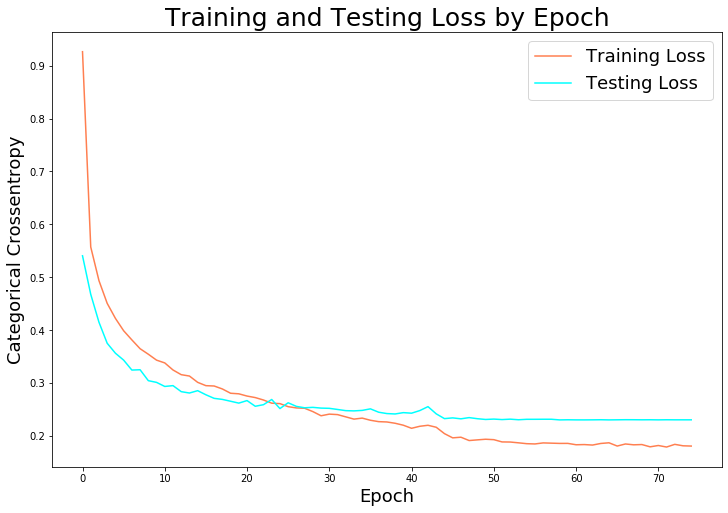

In [53]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='coral')
plt.plot(test_loss, label='Testing Loss', color='aqua')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
# plt.xticks([0, 1, 2, 3, 4], [1, 2, 3, 4, 5])

plt.legend(fontsize = 18);

In [54]:
y_pred = cnn_model.predict_classes(X_test)


## Scratch Work


In [55]:
corr_map = pd.DataFrame(y_pred)
corr_map.head(10)

,0
0,7
1,8
2,8
3,5
4,9
5,1
6,2
7,3
8,6
9,2


In [56]:
corr_map[0].value_counts()

7    1875
4    1857
3    1852
2    1816
6    1805
1    1774
8    1769
9    1759
0    1755
5    1738
Name: 0, dtype: int64

In [57]:
y_test.shape

(18000, 10)

In [73]:
y_pred.shape

(18000,)

In [74]:
corr_map['actual_preds'] = np.argmax(y_test, axis = 1)

In [75]:
corr_map['actual_preds'].shape

(18000,)

In [66]:
print(type(corr_map['actual_preds']))

<class 'pandas.core.series.Series'>


In [89]:
pd.Series(y_pred).value_counts()

7    1875
4    1857
3    1852
2    1816
6    1805
1    1774
8    1769
9    1759
0    1755
5    1738
dtype: int64

In [90]:
pd.Series(corr_map['actual_preds']).value_counts()

6    1846
7    1841
3    1822
2    1814
4    1805
1    1795
9    1794
0    1783
8    1762
5    1738
Name: actual_preds, dtype: int64

Text(0.5, 1, 'Confusion Matrix')

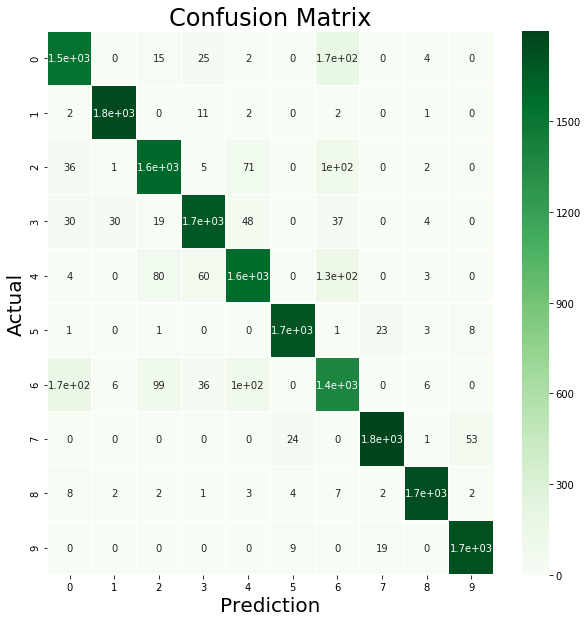

In [98]:

confusion_mtx = confusion_matrix(y_pred, corr_map['actual_preds'].values) 
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens")
plt.xlabel("Prediction", fontsize=20)
# plt.xticks([0,1], fontsize=16)
plt.ylabel("Actual", fontsize=20)
# plt.xticks([0,1], fontsize=16)
plt.title("Confusion Matrix", fontsize=24)


In [124]:
corr_map = pd.get_dummies(corr_map, columns=['actual_preds'])
corr_map.head()

,0,actual_preds_0,actual_preds_1,actual_preds_2,actual_preds_3,actual_preds_4,actual_preds_5,actual_preds_6,actual_preds_7,actual_preds_8,actual_preds_9
0,7,0,0,0,0,0,0,0,1,0,0
1,8,0,0,0,0,0,0,0,0,1,0
2,8,0,0,0,0,0,0,0,0,1,0
3,5,0,0,0,0,0,1,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,1


In [125]:
corr_map.head()

,0,actual_preds_0,actual_preds_1,actual_preds_2,actual_preds_3,actual_preds_4,actual_preds_5,actual_preds_6,actual_preds_7,actual_preds_8,actual_preds_9
0,7,0,0,0,0,0,0,0,1,0,0
1,8,0,0,0,0,0,0,0,0,1,0
2,8,0,0,0,0,0,0,0,0,1,0
3,5,0,0,0,0,0,1,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,1


In [138]:
score = corr_map['actual_preds_0'].groupby(corr_map[0])

In [148]:
score_0 = pd.DataFrame(score)
score_0.head(10)


,0,1
0,0,11 1 15 1 23 1 27 1 28...
1,1,5 0 13 0 19 0 26 0 30...
2,2,6 0 9 0 20 0 32 0 40...
3,3,7 0 21 0 34 0 51 0 60...
4,4,35 0 38 0 46 0 47 0 62...
5,5,3 0 10 0 29 0 45 0 53...
6,6,8 0 14 0 16 0 17 0 24...
7,7,0 0 12 0 33 0 83 0 95...
8,8,1 0 2 0 22 0 39 0 54...
9,9,4 0 18 0 25 0 36 0 37...


In [155]:
score_0[1].sum().sum()

0.0

0     7
1     8
2     8
3     5
4     9
5     1
6     2
7     6
8     6
9     2
10    5
11    0
12    7
13    1
14    6
15    0
16    6
17    2
18    9
19    1
20    2
21    4
22    8
23    0
24    4
25    9
26    1
27    0
28    0
29    5
30    1
32    2
33    7
34    3
35    4
36    9
37    9
38    4
39    8
40    2
45    5
46    4
47    4
51    3
53    5
54    8
60    3
62    3
83    7
95    7
Name: actual_preds, dtype: int64

In [161]:
corr_map

,0,actual_preds_0,actual_preds_1,actual_preds_2,actual_preds_3,actual_preds_4,actual_preds_5,actual_preds_6,actual_preds_7,actual_preds_8,actual_preds_9
0,7,0,0,0,0,0,0,0,1,0,0
1,8,0,0,0,0,0,0,0,0,1,0
2,8,0,0,0,0,0,0,0,0,1,0
3,5,0,0,0,0,0,1,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,1
5,1,0,1,0,0,0,0,0,0,0,0
6,2,0,0,1,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,1,0,0,0
8,6,0,0,0,0,0,0,1,0,0,0
9,2,0,0,1,0,0,0,0,0,0,0


In [99]:
Total = corr_map.groupby[0].sum()

TypeError: 'method' object is not subscriptable

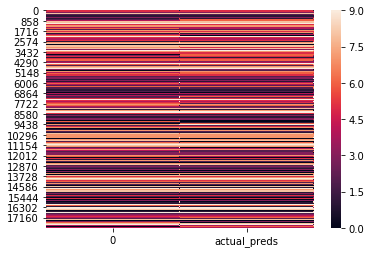

In [77]:
sns.heatmap(corr_map)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 50)        500       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 50)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 16)        7216      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               51328     
__________

In [156]:
data['label'].value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64